# Problem Description

Identify customers who may result in churn for a retail banking organization - churn can impact the topline and bottom line of the bank. The bank desires to cross-sell new digital banking products to such potential churn customers so that they reverse their decision to leave the banke


Dataset Description:

This data set contains detail of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Row Numbers: Row numbers from 1 to 10000

CustomerId: Unique IDs for bank customer identification 

Surname: Customer’s Last Name 

CreditScore: Credit score of the customer 

Geography: The country that the customer
belongs to

Gender: Male or Female

Age: Age of the customer

Tenure: Number of years for which the customer has been with the bank

Balance: Bank balance of the customer

NumOfProducts: Number of bank products the customer is using

In [39]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense

# 1. Load Dataset

We have a statement of accounts of all customers in three different countries and some columns to describe the status of customers such as, is this client active or not, average customer income, cline balance, does customer have a credit card, any moment or not, and after the columns containing personal data such as account number, customer name and customer gender, we will use this data to predict whether this customer will leave the bank or stay

# 2. Drop the customer's personal data columns that will not be useful for analysis.

# 3. Prepare independent variables X and dependent variable Y (Exited).

In [40]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [41]:
X = dataset.iloc[:, 3:-1].values # dropping first 3 columns to last and not including last column
Y = dataset.iloc[:, -1].values # Y is last column

# 4. LabelEncode the Gender Column

In [42]:
le = labelencoder = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

# 5. OneHotEncode the Geography column

Encode categorical features as one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete features). The features are encoded using a one-hot (aka 'one-of-K' or 'dummy') encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

In [43]:
ct = ColumnTransformer([("encoder", OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# 6. Perform a train test split in the ration 80:20 and random_state 0

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 7. Perform features scaling on X-train and X_test using Standard scaler

In [45]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Build a Keras Sequential model with the following layers

- Dense layer with 6 neurons and activation relu
- Dense layer with 6 neurons and activation relu
- Dense layer with 1 neuron and activation sigmoid

Initializing the ANN

In [46]:
ann = Sequential()

Adding the input layer and the first hidden layer

In [47]:
ann.add(Dense(units=6, activation='relu'))

Adding the second hidden layer

In [48]:
ann.add(Dense(units=6, activation='relu'))

Adding the output layer

In [49]:
ann.add(Dense(units=1, activation='sigmoid'))

Compile the model with adam optimizer, binary_crossentropy loss and metric accuracy

In [50]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model for 10 epochs and batch size 10

In [51]:
history = ann.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=10)

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.6776 - loss: 0.6032 - val_accuracy: 0.7950 - val_loss: 0.4679
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.7860 - loss: 0.4726 - val_accuracy: 0.7912 - val_loss: 0.4288
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8052 - loss: 0.4298 - val_accuracy: 0.8188 - val_loss: 0.4140
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.8094 - loss: 0.4277 - val_accuracy: 0.8275 - val_loss: 0.4046
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8208 - loss: 0.4089 - val_accuracy: 0.8288 - val_loss: 0.3936
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.8235 - loss: 0.4012 - val_accuracy: 0.8350 - val_loss: 0.3797
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8246 - loss: 0.3964 - val_accuracy: 0.8425 - val_loss: 0.3655
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.8385 - loss: 0.3740 - 

Max. Training Accuracy 0.851805567741394
Max. Validation Accuracy 0.8600000143051147


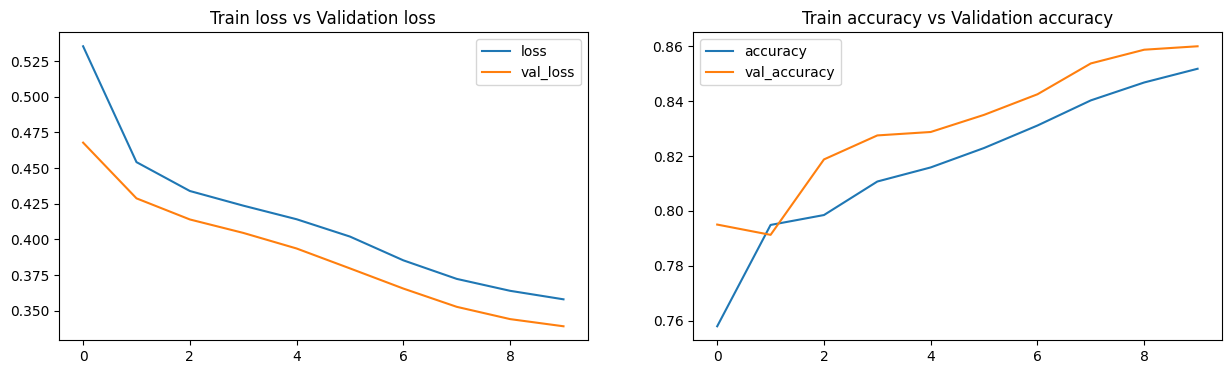

In [52]:
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    ax[0].plot(h.history['loss'])
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss', 'val_loss'])
    ax[0].title.set_text('Train loss vs Validation loss')

    ax[1].plot(h.history['accuracy'])
    ax[1].plot(h.history['val_accuracy'])
    ax[1].legend(['accuracy', 'val_accuracy'])
    ax[1].title.set_text('Train accuracy vs Validation accuracy')

    print('Max. Training Accuracy', max(h.history['accuracy']))
    print('Max. Validation Accuracy', max(h.history['val_accuracy']))
    plt.show()
plotModelHistory(history)

 Observation
 - Training Loss and Validation Loss decreases smoothly
 - Training accuracy and validation accuracy shows a continuous increase

# 9. Evaluate the model on the test set; print accuracy and confusion matrix

In [53]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion_matrix
[[1502   93]
 [ 204  201]]


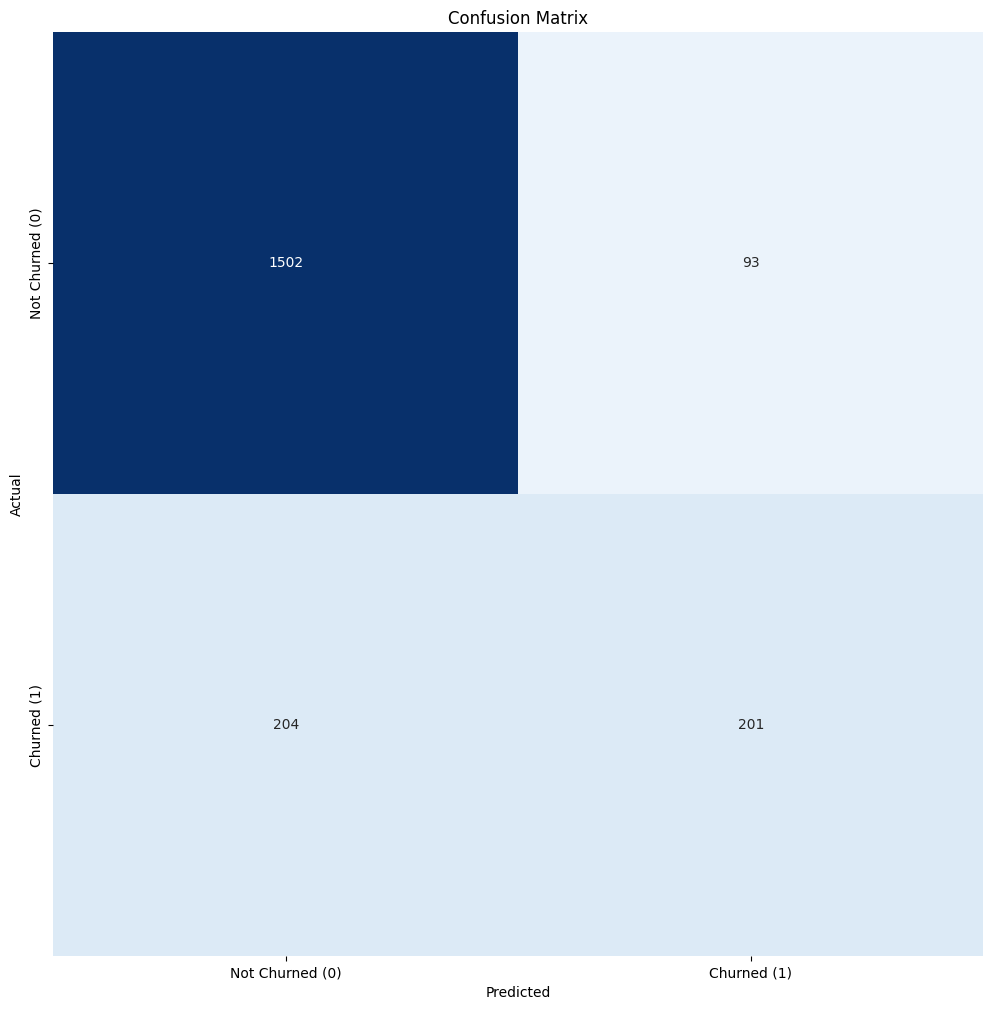

In [55]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix")
print(cm)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Not Churned (0)', 'Churned (1)'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [57]:
clr = classification_report(y_test, y_pred)
print("Classification Report\n", clr)

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.50      0.58       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [58]:
print("Accuracy Score: ")
print(accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score: 
85.15 %


Observation
- Both Classification report and confusion report says that Model is able to accurately predict people who don't churn.

- The model needs slight imporvement in predicting people who might churn

- Training the model with more epochs and other hyperparameter tuning will help to achieve this

- Model gives an accuracy of 85% on test set

- Recall shows how many of the clients who actually leave were detected by the model and precision shows how many of the clients identified by the model actually left.

- The recall values tries to reduce the False Negatives which is okay to have less value in this churn use case

# Task B:

•Use the built ANN model to predict if the customer with the following information will leave the bank:

• Geography: France

• Credit Score: 600

• Gender: Male

• Age: 40 years

• Tenure: 3 years

• Balance: $60000

• Number of Products: 2

• Does this customer have a credit card? Yes

• Is this customer an Active Member: Yes

• Estimated Salary: $50000

So, should we let the customer go?

In [59]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[False]]


Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into double pair of square brackets makes the input exactly a 2D array.

Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0," in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And becaure to include these values in the first three columns, because the dummy variables are always created in the first columns